In [1]:
import fastf1 as ff1
from fastf1 import plotting
import numpy as np
from matplotlib import pyplot as plt

In [131]:
# Team and drivers colors
team_colors = {
    'Red Bull Racing': '#1E41FF',    # Blue
    'Ferrari': '#DC0000',            # Red
    'McLaren': '#FF8700',            # Orange
    'Alpine': '#FF69B4',             # Cyan
    'Aston Martin': '#007A33',       # Green
    'Kick Sauber': '#9B0000',              # Dark Red
    'Williams': '#FFFFFF',           # White
    'RB': '#212B7E',         # Dark Blue
    'Haas': '#595959',               # Dark Gray
    'Mercedes': '#00D2BE',           # Silver
}

driver_color = {
    'LEC': 'Ferrari',
    'SAI': 'Ferrari',
    'VER': 'Red Bull Racing',
    'PER': 'Red Bull Racing',
    'PIA': 'McLaren',
    'NOR': 'McLaren',
    'RUS': 'Mercedes',
    'HAM': 'Mercedes',
    'TSU': 'RB',
    'RIC': 'RB',
    'HUL': 'Haas F1 Team',
    'MAG': 'Haas F1 Team',
    'OCO': 'Alpine',
    'GAS': 'Alpine',
    'ALO': 'Aston Martin',
    'STR': 'Aston Martin',
    'ALB': 'Williams',
    'SAR': 'Williams',
    'BOT': 'Kick Sauber',
    'ZHO': 'Kick Sauber',
}

In [103]:
# Enable the cache by providing the name of the cache folder, speed up
ff1.Cache.enable_cache('cache')

# Setup plotting, setup the plot (bg: black, ...)
plotting.setup_mpl()

In [3]:
session = ff1.get_session(2024, 'Imola', 'Q')
session.load()

core           INFO 	Loading data for Emilia Romagna Grand Prix - Qualifying [v3.3.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver  2: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '4', '16', '55', '63', '22', '44', '3', '27', '11', '31', '18', '23', '10', '77', '24', '20', '14', '2']


In [149]:
results = session.results

In [4]:
track_data = session.get_circuit_info()
track_corners = track_data.corners

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [5]:
# telemetry for track map
driver = 'VER'
fastest_driver = session.laps.pick_driver(driver).pick_fastest()
telemetry_driver = fastest_driver.get_telemetry().add_distance()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


<b>Track Map</b>

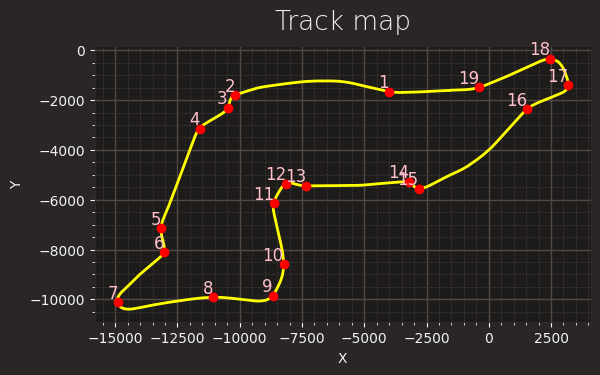

In [120]:
fig, axes = plt.subplots()

axes.plot(telemetry_driver['X'], telemetry_driver['Y'], color='yellow', linewidth = 2)

axes.plot(track_corners['X'], track_corners['Y'], 'ro')

for i, (x, y, corner_number) in track_corners[['X', 'Y', 'Number']].iterrows():
    axes.text(x, y, str(int(corner_number)), color='pink', fontsize=12, ha='right', va='bottom')


axes.set(xlabel = "X", ylabel = "Y", title="Track map")

axes.set_aspect('equal', adjustable='box')

<b>Speed</b>

In [7]:
v = telemetry_driver['Speed'] / 3.6     # km/h > m/s
time_float = telemetry_driver['Time'] / np.timedelta64(1, 's')  # dd > seconds

[Text(0.5, 0, 'Distance (m)'), Text(0, 0.5, 'Speed (km/h)')]

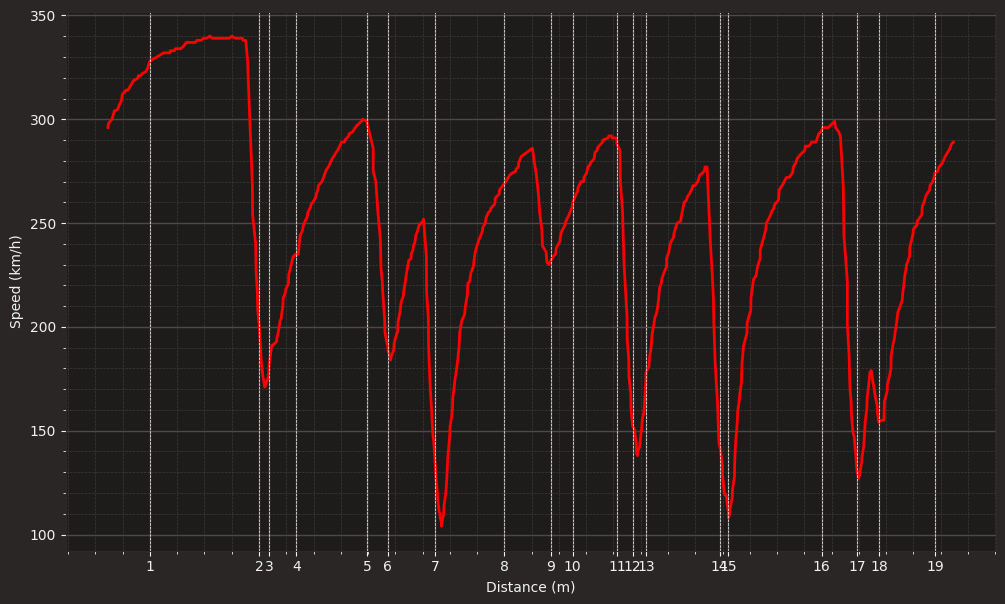

In [8]:
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(telemetry_driver['Distance'], telemetry_driver['Speed'], color='r', linewidth = 2)

for distance, number in zip(track_corners['Distance'], track_corners['Number']):
    axes.axvline(x=distance, linestyle='--', color='w', linewidth = 0.5)

axes.set_xticks(track_corners['Distance'])
axes.set_xticklabels(track_corners['Number'])

axes.set(xlabel = "Distance (m)", ylabel = "Speed (km/h)")
# axes.set_aspect('equal', adjustable='box')


<b>List of drivers fastest times</b>

In [75]:
drivers_list = session.drivers

drivers_fastest_laps = []
for driver_number in drivers_list:
    fastest_lap = session.laps.pick_driver(driver_number).pick_fastest()
    if not fastest_lap.isnull().all():
        drivers_fastest_laps.append(fastest_lap)


c:\Users\Luca\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:3112: FutureWarning: In the future, `None` will be returned instead of an empty `Lap` object when there are no laps that satisfy the definition for fastest lap.
  warnings.warn(("In the future, `None` will be returned instead of "


<b>Drivers fastest lap times [BAR]</b>

(72.746, 77.417)

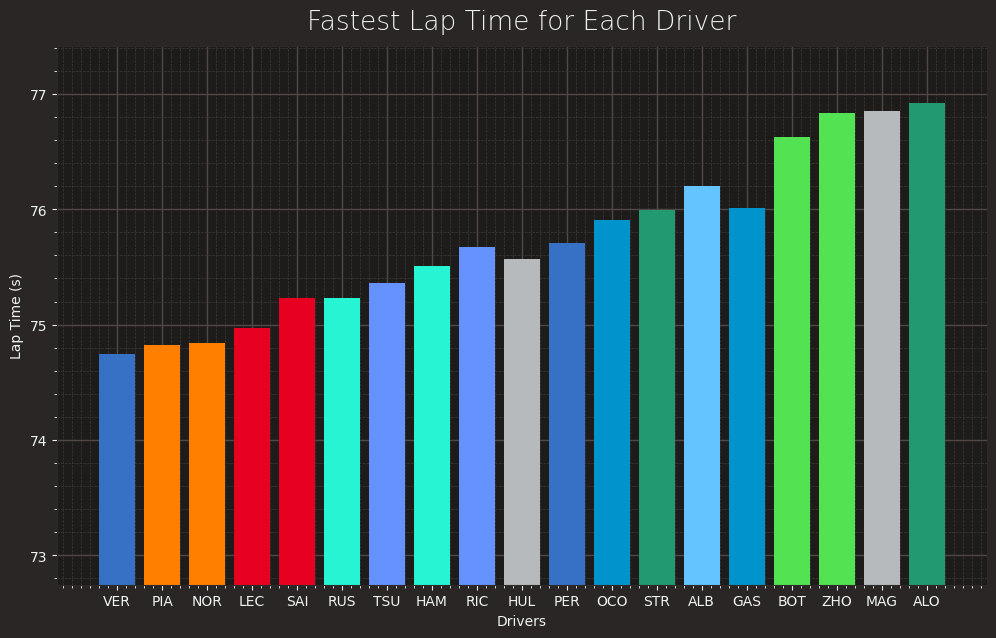

In [154]:
drivers = []
lap_times = []

for d in drivers_fastest_laps:
    lap_time_seconds = (d.LapTime / np.timedelta64(1, 's'))
    drivers.append(d.Driver)
    lap_times.append(lap_time_seconds)

bar_colors = ['#' + results.loc[results['Abbreviation'] == driver, 'TeamColor'].iloc[0] for driver in drivers]

fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(drivers, lap_times, color=bar_colors)

ax.set_xlabel('Drivers')
ax.set_ylabel('Lap Time (s)')
ax.set_title('Fastest Lap Time for Each Driver')

min_y = min(lap_times) - 2  # 2 seconds below the minimum lap time
max_y = max(lap_times) + 0.5 # 2 seconds above the maximum lap time
ax.set_ylim([min_y, max_y])

<b>List of teams fastest times</b>

In [133]:
teams_list = session.laps['Team'].unique()

teams_fastest_laps = []
for team_name in teams_list:
    fastest_lap = session.laps.pick_team(team_name).pick_fastest()
    if not fastest_lap.isnull().all():
        teams_fastest_laps.append(fastest_lap)


(72.746, 77.126)

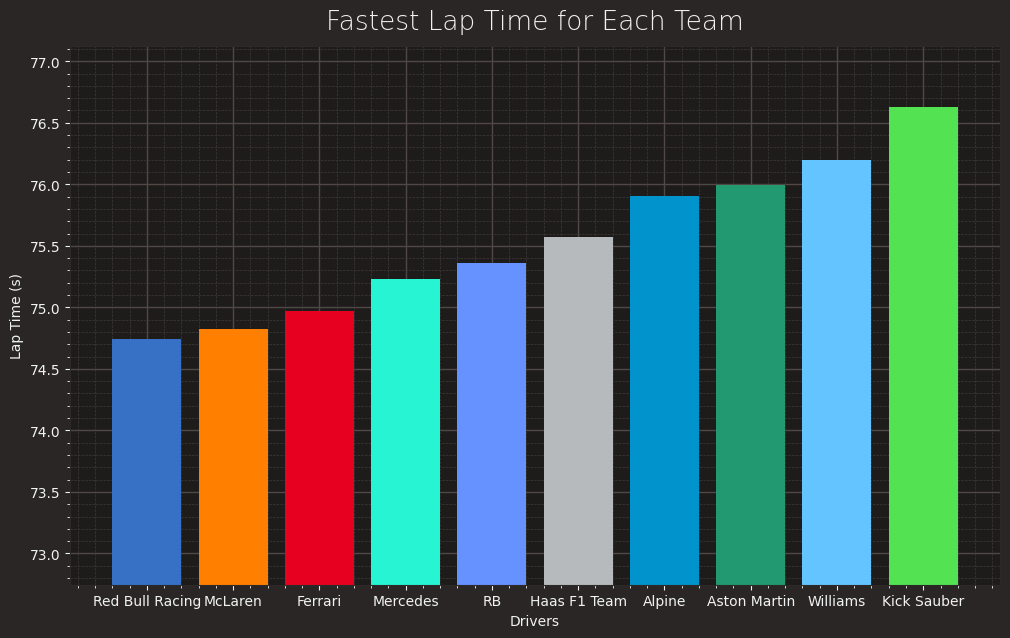

In [155]:
teams = []
lap_times = []

for t in teams_fastest_laps:
    lap_time_seconds = (t.LapTime / np.timedelta64(1, 's'))
    teams.append(t.Team)
    lap_times.append(lap_time_seconds)

bar_colors = ['#' + results.loc[results['TeamName'] == team, 'TeamColor'].iloc[0] for team in teams]
#bar_colors = [team_colors.get(team, 'gray') for team in teams]

fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(teams, lap_times, color=bar_colors)

ax.set_xlabel('Drivers')
ax.set_ylabel('Lap Time (s)')
ax.set_title('Fastest Lap Time for Each Team')

min_y = min(lap_times) - 2  # 2 seconds below the minimum lap time
max_y = max(lap_times) + 0.5 # 2 seconds above the maximum lap time
ax.set_ylim([min_y, max_y])

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

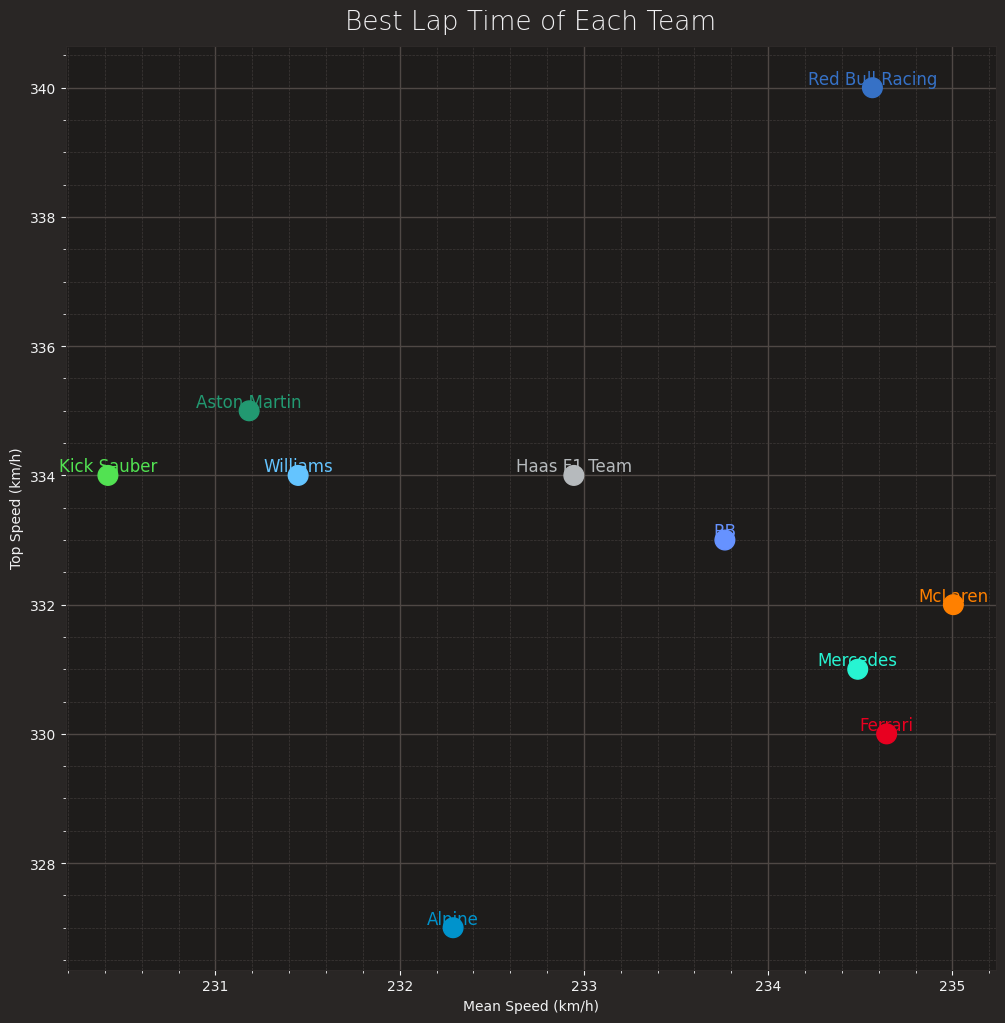

In [197]:
teams = []
average_vs = []
max_vs = []

for t in teams_fastest_laps:
    telemetry_team = t.get_telemetry()
    v = telemetry_team['Speed']
    average_v = sum(v) / len(v)
    
    max_v = max(v)
    teams.append(t.Team)
    average_vs.append(average_v)
    max_vs.append(max_v)

bar_col = [results.loc[results['TeamName'] == team, 'TeamColor'].iloc[0] for team in teams]
bar_colors = ['#' + results.loc[results['TeamName'] == team, 'TeamColor'].iloc[0] for team in teams]

fig, ax = plt.subplots(figsize=(12, 12))

ax.scatter(average_vs, max_vs, color=bar_colors, s=200)

for i in range(len(average_vs)):
    ax.text(average_vs[i], 
              max_vs[i], 
              results.loc[results['TeamColor'] == bar_col[i], 'TeamName'].iloc[0], 
              color=bar_colors[i], 
              fontsize=12, ha='center', va='bottom')

ax.set_xlabel('Mean Speed (km/h)')
ax.set_ylabel('Top Speed (km/h)')
ax.set_title('Best Lap Time of Each Team')

# min_x = min(average_vs) - 0.2  # 2 seconds below the minimum lap time
# max_x = max(average_vs) + 0.2 # 2 seconds above the maximum lap time
# ax.set_xlim([min_x, min_x])

axes.set_aspect('equal', adjustable='box')


In [ ]:
def calculateAverage(v):
    
    return()

In [92]:
session.laps.pick_driver(driver)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:18:58.059000,VER,1,NaT,1.0,1.0,0 days 00:17:15.546000,NaT,NaT,0 days 00:00:41.122000,...,True,Red Bull Racing,0 days 00:17:15.546000,2024-05-18 14:04:55.275,1,NaN,False,,False,False
1,0 days 00:20:14.072000,VER,1,0 days 00:01:16.013000,2.0,1.0,NaT,NaT,0 days 00:00:23.949000,0 days 00:00:26.337000,...,True,Red Bull Racing,0 days 00:18:58.059000,2024-05-18 14:06:37.788,1,NaN,False,,False,True
2,0 days 00:22:03.824000,VER,1,0 days 00:01:49.752000,3.0,1.0,NaT,0 days 00:21:59.392000,0 days 00:00:36.105000,0 days 00:00:37.328000,...,True,Red Bull Racing,0 days 00:20:14.072000,2024-05-18 14:07:53.801,1,NaN,False,,False,False
3,0 days 00:29:25.843000,VER,1,NaT,4.0,2.0,0 days 00:27:40.772000,NaT,NaT,0 days 00:00:38.326000,...,False,Red Bull Racing,0 days 00:22:03.824000,2024-05-18 14:09:43.553,12,NaN,False,,False,False
4,0 days 00:30:41.605000,VER,1,0 days 00:01:15.762000,5.0,2.0,NaT,NaT,0 days 00:00:23.746000,0 days 00:00:26.348000,...,False,Red Bull Racing,0 days 00:29:25.843000,2024-05-18 14:17:05.572,1,NaN,False,,False,True
5,0 days 00:32:15.762000,VER,1,0 days 00:01:34.157000,6.0,2.0,NaT,0 days 00:32:11.320000,0 days 00:00:30.387000,0 days 00:00:30.154000,...,False,Red Bull Racing,0 days 00:30:41.605000,2024-05-18 14:18:21.334,1,NaN,False,,False,False
6,0 days 00:40:01.608000,VER,1,NaT,7.0,3.0,0 days 00:38:24.727000,NaT,NaT,0 days 00:00:36.175000,...,True,Red Bull Racing,0 days 00:32:15.762000,2024-05-18 14:19:55.491,12,NaN,False,,False,False
7,0 days 00:41:16.994000,VER,1,0 days 00:01:15.386000,8.0,3.0,NaT,NaT,0 days 00:00:23.774000,0 days 00:00:26.070000,...,True,Red Bull Racing,0 days 00:40:01.608000,2024-05-18 14:27:41.337,1,NaN,False,,False,True
8,0 days 00:43:03.725000,VER,1,0 days 00:01:46.731000,9.0,3.0,NaT,0 days 00:42:58.694000,0 days 00:00:32.781000,0 days 00:00:35.622000,...,True,Red Bull Racing,0 days 00:41:16.994000,2024-05-18 14:28:56.723,1,NaN,False,,False,False
9,0 days 00:51:42.901000,VER,1,NaT,10.0,4.0,0 days 00:49:57.768000,NaT,NaT,0 days 00:00:37.573000,...,False,Red Bull Racing,0 days 00:43:03.725000,2024-05-18 14:30:43.454,1,NaN,False,,False,False


In [159]:
telemetry_driver

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance
2,2024-05-18 14:16:10.770,0 days 00:28:31.041000,,185.626111,0 days 00:00:00,11379,292,7,100,False,12,interpolation,0.000035,OnTrack,-1613.214305,-1610.852047,785.844775,0.000000
3,2024-05-18 14:16:10.808,0 days 00:28:31.079000,,185.626111,0 days 00:00:00.038000,11317,293,7,100,False,12,pos,0.000667,OnTrack,-1648.000000,-1613.000000,786.000000,3.092778
4,2024-05-18 14:16:10.867,0 days 00:28:31.138000,,185.626111,0 days 00:00:00.097000,11194,294,7,100,False,12,car,0.001652,OnTrack,-1691.296416,-1615.686542,786.225996,7.911111
5,2024-05-18 14:16:11.108,0 days 00:28:31.379000,,185.626111,0 days 00:00:00.338000,10843,296,7,100,False,12,pos,0.005698,OnTrack,-1796.000000,-1622.000000,787.000000,27.726667
6,2024-05-18 14:16:11.147,0 days 00:28:31.418000,63,185.626111,0 days 00:00:00.377000,10492,298,8,100,False,12,car,0.006355,OnTrack,-1820.164627,-1623.330361,787.114330,30.955000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,2024-05-18 14:17:27.009,0 days 00:29:47.280000,2,456.249167,0 days 00:01:16.239000,11460,286,7,100,False,14,pos,0.986539,OnTrack,-1322.000000,-1594.000000,785.000000,4859.710833
579,2024-05-18 14:17:27.148,0 days 00:29:47.419000,2,454.249167,0 days 00:01:16.378000,11482,287,7,100,False,12,car,0.988792,OnTrack,-1397.624249,-1597.400054,785.444498,4870.792222
580,2024-05-18 14:17:27.329,0 days 00:29:47.600000,2,452.382500,0 days 00:01:16.559000,11482,288,7,100,False,12,pos,0.991736,OnTrack,-1465.000000,-1603.000000,786.000000,4885.272222
581,2024-05-18 14:17:27.388,0 days 00:29:47.659000,2,450.515833,0 days 00:01:16.618000,11482,289,7,100,False,12,car,0.992701,OnTrack,-1505.883327,-1605.578460,786.188731,4890.008611


In [150]:
team_color = results.loc[results['DriverNumber'] == '1', 'TeamColor'].iloc[0]
print(team_color)

3671C6


In [178]:
results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,NED,1.0,,NaN,0 days 00:01:15.762000,0 days 00:01:15.176000,0 days 00:01:14.746000,NaT,,NaN
81,81,O PIASTRI,PIA,piastri,McLaren,FF8000,mclaren,Oscar,Piastri,Oscar Piastri,...,AUS,2.0,,NaN,0 days 00:01:15.940000,0 days 00:01:15.407000,0 days 00:01:14.820000,NaT,,NaN
4,4,L NORRIS,NOR,norris,McLaren,FF8000,mclaren,Lando,Norris,Lando Norris,...,GBR,3.0,,NaN,0 days 00:01:15.915000,0 days 00:01:15.371000,0 days 00:01:14.837000,NaT,,NaN
16,16,C LECLERC,LEC,leclerc,Ferrari,E80020,ferrari,Charles,Leclerc,Charles Leclerc,...,MON,4.0,,NaN,0 days 00:01:15.823000,0 days 00:01:15.328000,0 days 00:01:14.970000,NaT,,NaN
55,55,C SAINZ,SAI,sainz,Ferrari,E80020,ferrari,Carlos,Sainz,Carlos Sainz,...,ESP,5.0,,NaN,0 days 00:01:16.015000,0 days 00:01:15.512000,0 days 00:01:15.233000,NaT,,NaN
63,63,G RUSSELL,RUS,russell,Mercedes,27F4D2,mercedes,George,Russell,George Russell,...,GBR,6.0,,NaN,0 days 00:01:16.107000,0 days 00:01:15.671000,0 days 00:01:15.234000,NaT,,NaN
22,22,Y TSUNODA,TSU,tsunoda,RB,6692FF,rb,Yuki,Tsunoda,Yuki Tsunoda,...,JPN,7.0,,NaN,0 days 00:01:15.894000,0 days 00:01:15.358000,0 days 00:01:15.465000,NaT,,NaN
44,44,L HAMILTON,HAM,hamilton,Mercedes,27F4D2,mercedes,Lewis,Hamilton,Lewis Hamilton,...,GBR,8.0,,NaN,0 days 00:01:16.604000,0 days 00:01:15.677000,0 days 00:01:15.504000,NaT,,NaN
3,3,D RICCIARDO,RIC,ricciardo,RB,6692FF,rb,Daniel,Ricciardo,Daniel Ricciardo,...,AUS,9.0,,NaN,0 days 00:01:16.060000,0 days 00:01:15.691000,0 days 00:01:15.674000,NaT,,NaN
27,27,N HULKENBERG,HUL,hulkenberg,Haas F1 Team,B6BABD,haas,Nico,Hulkenberg,Nico Hulkenberg,...,GER,10.0,,NaN,0 days 00:01:15.841000,0 days 00:01:15.569000,0 days 00:01:15.980000,NaT,,NaN
